In [66]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
from skimage import io

In [67]:
start = time.time()
#importation des données
articles = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\articles.csv/articles.csv',nrows=20000)
users = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\customers.csv/customers.csv')
df = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\transactions_train.csv/transactions.csv',nrows=15000)

In [68]:
df = df.merge(articles, on='article_id')

In [69]:
df = df[['t_dat', 'customer_id', 'article_id', 'prod_name', 'product_type_name',
       'product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc']]

In [70]:
feature_subset = ['product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name']

In [71]:
#Transformation des données
features = feature_subset
df1 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)

In [72]:
#Transformation des données
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [73]:
#construction de la matrice Features - Items 
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Definition de la matrice TF-IDF Vectorizer Object.
#les stop world en anglais sont enlevés 
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(articles["detail_desc"].values.astype('U'))
tfidf_matrix.shape

(20000, 1798)

In [75]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [76]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(articles.index, index=articles['article_id']).drop_duplicates()

In [77]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(article, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[article]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
        
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    articles_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return articles['article_id'].iloc[articles_indices].values

In [78]:
#creation du tableau d'article et similarité, 10 articles sont proposées
df3 = pd.DataFrame( columns =['article_id', 'Article Similaire'])
for i in range(articles.shape[0]):
    art = articles['article_id'][i]
    df3.loc[i]=[art,get_recommendations(art)]

In [79]:
end = time.time()
print(end - start)

262.2943458557129


In [80]:
%%time
df3

Wall time: 0 ns


,article_id,Article Similaire
0,108775015,"[108775044, 108775051, 538699001, 538699002, 5..."
1,108775044,"[108775044, 108775051, 538699001, 538699002, 5..."
2,108775051,"[108775044, 108775051, 538699001, 538699002, 5..."
3,110065001,"[110065002, 110065011, 531697001, 531697002, 5..."
4,110065002,"[110065002, 110065011, 531697001, 531697002, 5..."
...,...,...
19995,586608009,"[586608003, 586608004, 586608005, 586608009, 5..."
19996,586645001,"[579475001, 539473001, 579865001, 579865002, 5..."
19997,586648001,"[579198001, 555055001, 555055002, 555055005, 5..."
19998,586651002,"[586651005, 581293001, 581293002, 581293003, 5..."


In [81]:
df3.to_csv('hmpredictions1.csv')

In [82]:
#création de la vérification 
newdata=pd.DataFrame(columns=articles.columns)
def Rechercher_caracteristiques(num,newdata):
    for j in range(articles.shape[0]):
        if (articles.iloc[j].article_id)==(num):
            o=j
            break
    newdata=pd.DataFrame(columns=articles.columns)
    L = articles.loc[o]
    newdata=newdata.append(L)
    return newdata.T

In [83]:
%%time
Rechercher_caracteristiques(108775015,newdata)

Wall time: 12 ms


,0
article_id,108775015
product_code,108775
prod_name,Strap top
product_type_no,253
product_type_name,Vest top
product_group_name,Garment Upper body
graphical_appearance_no,1010016
graphical_appearance_name,Solid
colour_group_code,9
colour_group_name,Black


In [84]:
indices = pd.Series(df3.index, index=df3['article_id']).drop_duplicates()
le_df=pd.DataFrame(columns=articles.columns)
indices2=pd.Series(articles['article_id'])
def construction(articleid,le_df): 
    idx = indices[articleid]
    LI=df3.loc[idx]["Article Similaire"]
    for l in LI:
        index2=indices2[indices2 == l].index[0]
        h=index2
        O = articles.loc[h]
        le_df=le_df.append(O)
    return le_df.T

In [85]:
%%time
construction(108775015,le_df)

Wall time: 75.8 ms


,1,2,10109,10110,10111,3576,3577,3578,3579,3580
article_id,108775044,108775051,538699001,538699002,538699007,458393001,458393008,458393010,458393011,458393012
product_code,108775,108775,538699,538699,538699,458393,458393,458393,458393,458393
prod_name,Strap top,Strap top (1),V-neck strap top,V-neck strap top,V-neck strap top,SERENA 2p tank,SERENA 2p tank (1),SERENA 2p tank (1),SERENA 2p tank (1),Serena Tank 2PACK
product_type_no,253,253,253,253,253,253,253,253,253,253
product_type_name,Vest top,Vest top,Vest top,Vest top,Vest top,Vest top,Vest top,Vest top,Vest top,Vest top
product_group_name,Garment Upper body,Garment Upper body,Garment Upper body,Garment Upper body,Garment Upper body,Garment Upper body,Garment Upper body,Garment Upper body,Garment Upper body,Garment Upper body
graphical_appearance_no,1010016,1010017,1010016,1010016,1010016,1010016,1010010,1010016,1010010,1010016
graphical_appearance_name,Solid,Stripe,Solid,Solid,Solid,Solid,Melange,Solid,Melange,Solid
colour_group_code,10,11,9,12,10,9,7,73,7,9
colour_group_name,White,Off White,Black,Light Beige,White,Black,Grey,Dark Blue,Grey,Black


In [86]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(articles["detail_desc"].values.astype('U'))
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices2=pd.Series(articles['article_id'])
indices = pd.Series(articles['article_id'].values)
le_df=pd.DataFrame( columns =['article_id', 'Caractéristiques', 'Similarité'])
Features_a_inclure = ['index_name', 'section_name', 'product_group_name', 'product_type_name', 'garment_group_name', 'detail_desc', 'colour_group_name']
def recommendations_bis(article_id,le_df, cos_sim = cosine_sim):
    #construction de l'index,articles et taux de similarité
    recommended_articles = []
    index = indices[indices == article_id].index[0]
    similarity_scores = pd.Series(cos_sim[index]).sort_values(ascending = False)
    top_12_articles_scores = list(similarity_scores.iloc[1:13])
    top_12_articles_index= list(similarity_scores.iloc[1:13].index)
    for i in top_12_articles_index:
        recommended_articles.append(list(articles['article_id'])[i])
     #construction du dataframe final
    for l in recommended_articles:
        index2=indices2[indices2 == l].index[0]
        h=index2
        C=articles[Features_a_inclure].iloc[h].values
        D=recommended_articles.index(l)
        O = [articles.iloc[index2].prod_name,C,top_12_articles_scores[D]]
        le_df.loc[D] = O    
    return le_df

In [87]:
df8=recommendations_bis(108775015,le_df,cos_sim = cosine_sim)
df8

,article_id,Caractéristiques,Similarité
0,Strap top (1),"[Ladieswear, Womens Everyday Basics, Garment U...",1.000000
1,Strap top,"[Ladieswear, Womens Everyday Basics, Garment U...",1.000000
2,V-neck strap top,"[Ladieswear, Womens Everyday Basics, Garment U...",0.886837
3,V-neck strap top,"[Ladieswear, Womens Everyday Basics, Garment U...",0.886837
4,V-neck strap top,"[Ladieswear, Womens Everyday Basics, Garment U...",0.886837
5,SERENA 2p tank,"[Children Sizes 134-170, Girls Underwear & Bas...",0.787891
6,Serena Tank 2PACK,"[Children Sizes 134-170, Girls Underwear & Bas...",0.787891
7,SERENA 2p tank (1),"[Children Sizes 134-170, Girls Underwear & Bas...",0.787891
8,SERENA 2p tank (1),"[Children Sizes 134-170, Girls Underwear & Bas...",0.787891
9,SERENA 2p tank (1),"[Children Sizes 134-170, Girls Underwear & Bas...",0.787891


In [88]:
df8.to_csv('df8.csv')

In [89]:
df3.to_csv('Predictionhm.csv')

In [90]:
def plot_prev(prev_items):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, k, i)
        plt.imshow(image)

In [91]:
def plot_rcmnd(rcmnds):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, k, i)
        plt.imshow(image)

In [92]:
k=10
rcmnds=df3.iloc[1]["Article Similaire"]
path = "F:\images"

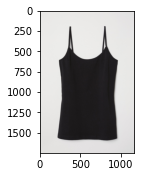

In [93]:
plot_prev(['108775015'])

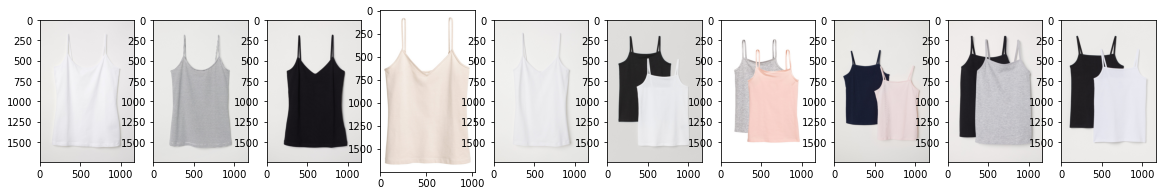

In [94]:
plot_rcmnd(rcmnds)

In [95]:
rcmnds

array([108775044, 108775051, 538699001, 538699002, 538699007, 458393001,
       458393008, 458393010, 458393011, 458393012], dtype=int64)